<a href="https://colab.research.google.com/github/varnit836/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/bank-full.csv'     
data=pd.read_csv(file_path, sep = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
#Checking shape of data.
print("Rows - ", data.shape[0])
print("Columns - ", data.shape[1])

Rows -  45211
Columns -  17


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.duplicated().sum()

0

So we don't have any null or duplicate values.

In [9]:
# Describing data 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [10]:
#checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.0 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


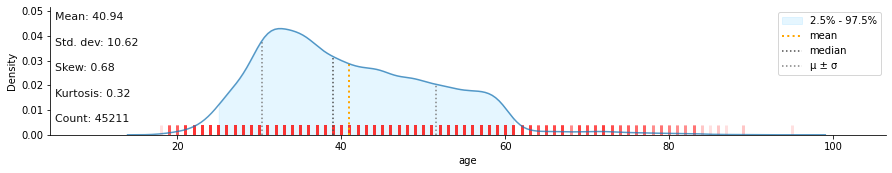

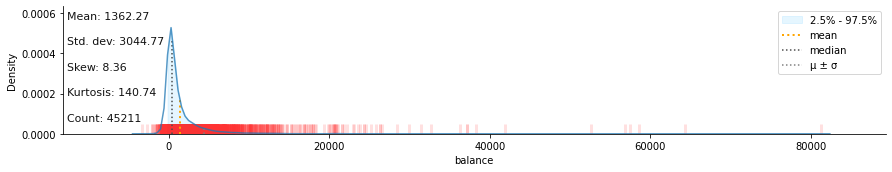

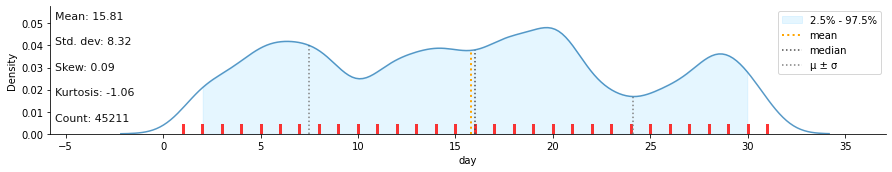

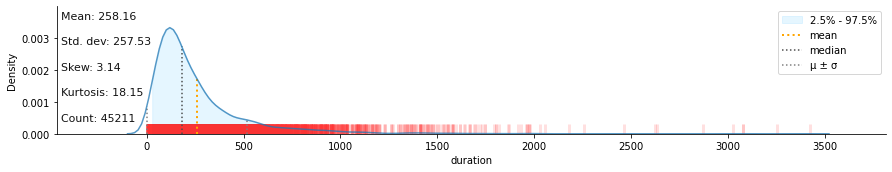

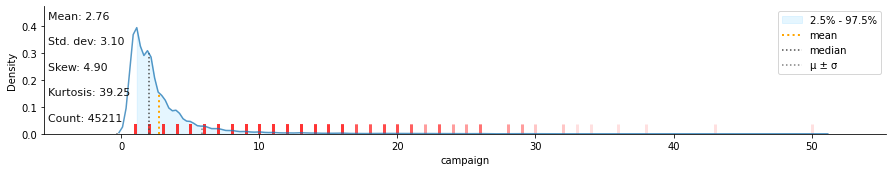

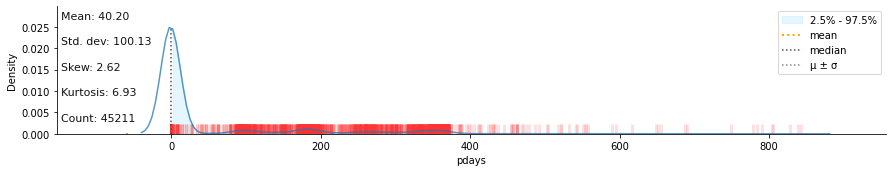

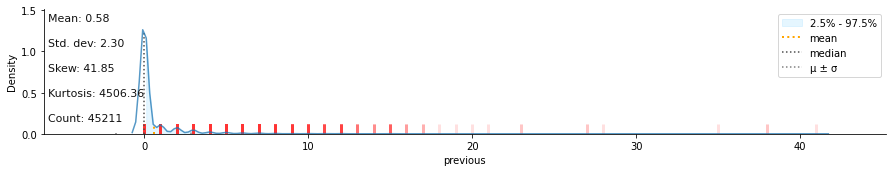

In [13]:
# distribution plot
klib.dist_plot(data)

So from above graphs we conclude that some columns have outliers which should be removed.

**Categorical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

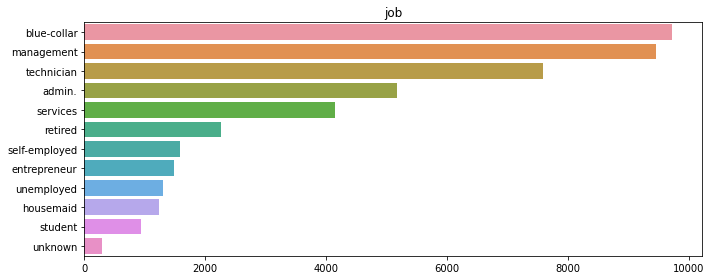

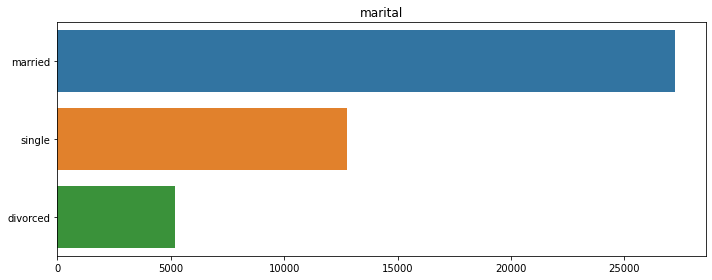

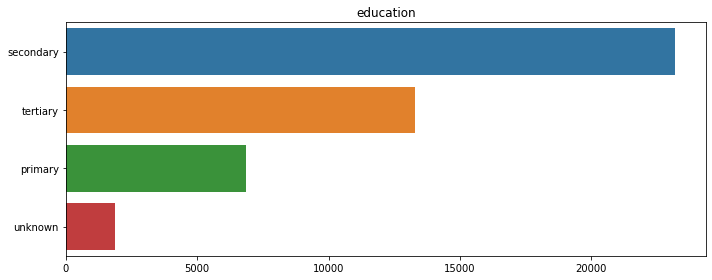

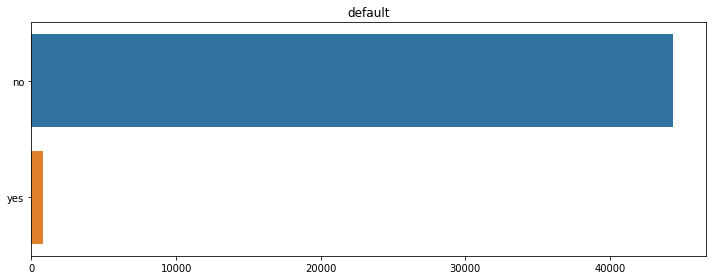

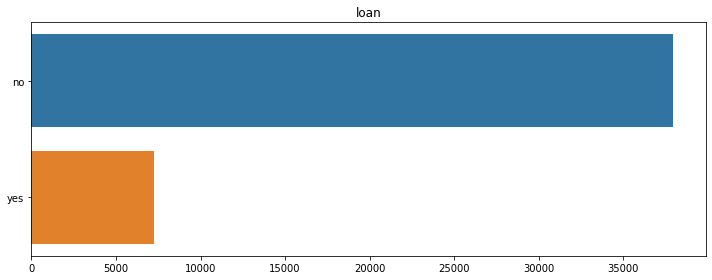

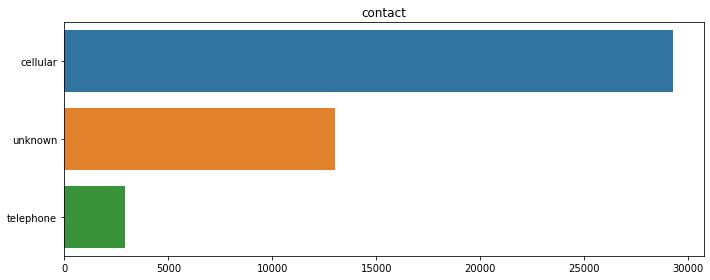

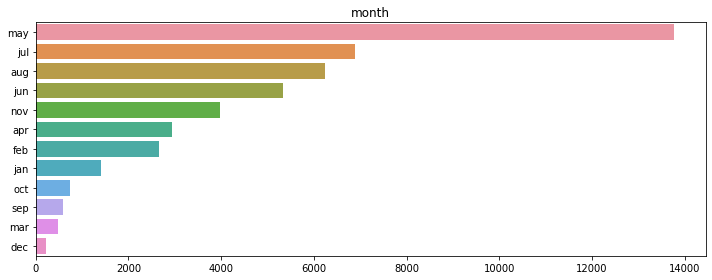

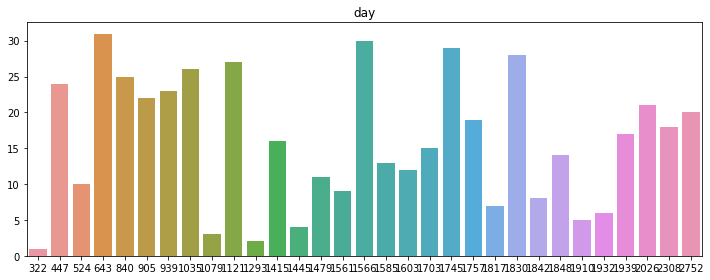

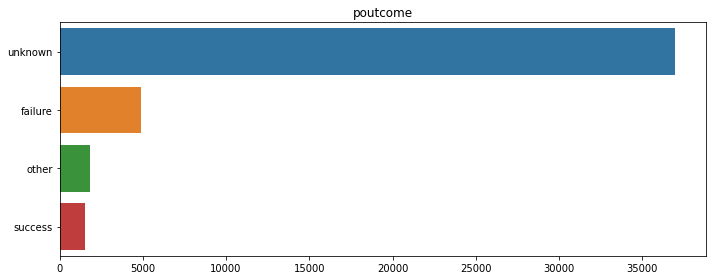

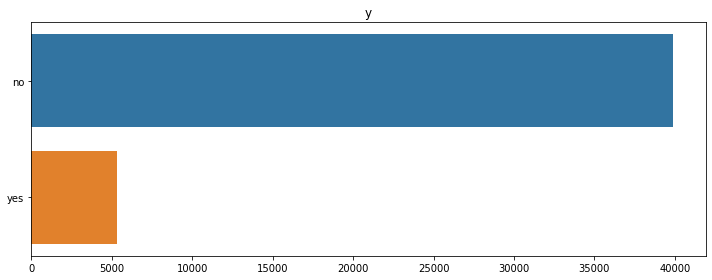

In [14]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#Analysis All Columns With Target variable

##1.Age

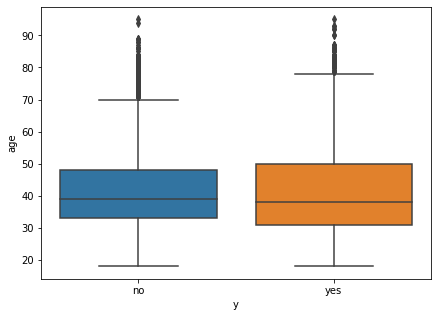

In [15]:
# Plotting the box plot 
plt.figure(figsize=(7,5))
sns.boxplot(y='age',x="y", data= data)
plt.show()

##2.Job

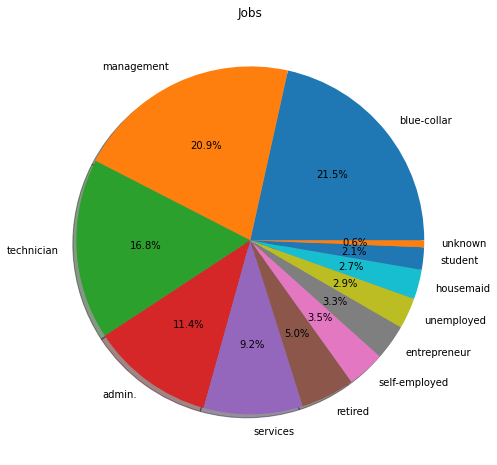

In [16]:
#pie plot of job 
plt.figure(figsize=(8,8))
plt.pie(data.job.value_counts(),labels=data.job.value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title('Jobs')
plt.show()

In [17]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


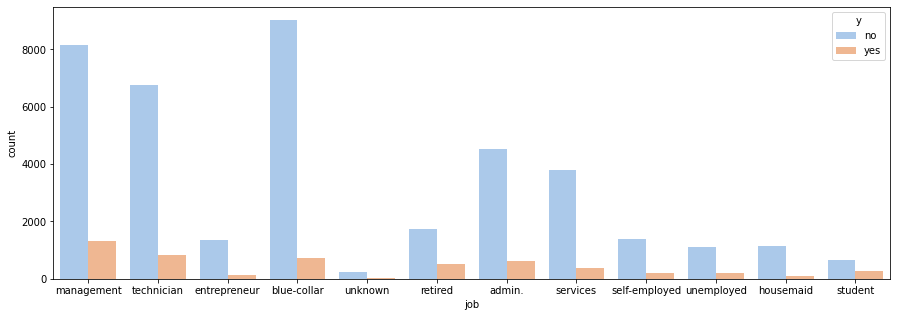

In [18]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(15,5))
#sns.countplot(data.job, ax=ax, palette='pastel')
sns.countplot(data.job, hue=data.y,ax=ax, palette='pastel')

**Observation** - Blue-collar, management and technician  showed maximum interest in subscription.

##3. Martial status

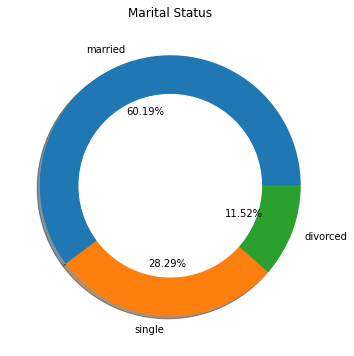

In [19]:
#Lets see pie plot of Martial status 
plt.figure(figsize=(6,6))
plt.pie(data.marital.value_counts(),labels=data.marital.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

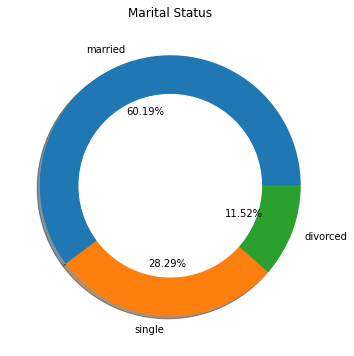

In [20]:
#Lets see pie plot of Martial status 
plt.figure(figsize=(6,6))
plt.pie(data.marital.value_counts(),labels=data.marital.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

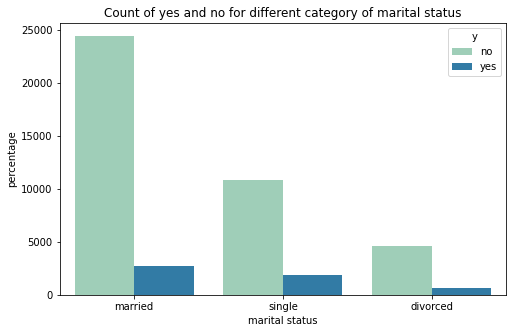

In [21]:
#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.marital, hue=data.y,ax=ax, palette='YlGnBu')
plt.xlabel('marital status',fontsize=10)
plt.ylabel('percentage',fontsize=10)
plt.title('Count of yes and no for different category of marital status')

**Observation** - Married and Single have more intrest in deposite.

##4.Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for different education level')

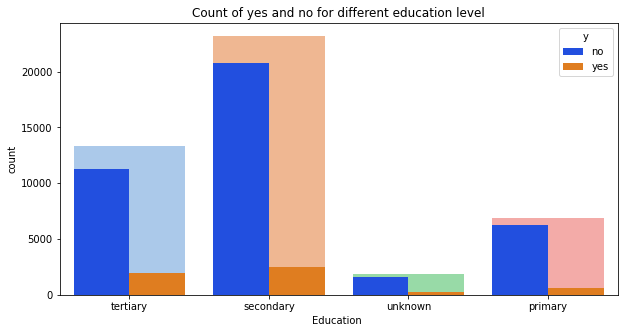

In [22]:
# deposit term on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data.education, ax=ax, palette='pastel')
sns.countplot(data.education, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

**Observation** - People with secondary and tertiary education were more driven towards paying term deposit in bank as comparison to primary, tertiary  and some unknown education.

##5.Default

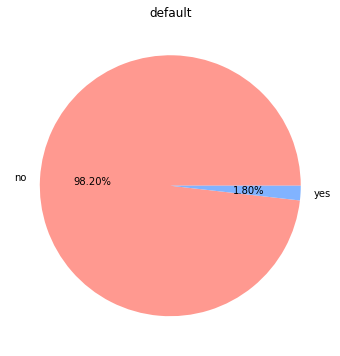

In [23]:
#Lets see pie plot of default 
plt.figure(figsize=(6,6))
colors = ['#ff9990','#81b3ff']
plt.pie(data.default.value_counts(),labels=data.default.value_counts().index,autopct='%1.2f%%',colors=colors)

plt.title('default')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for default category')

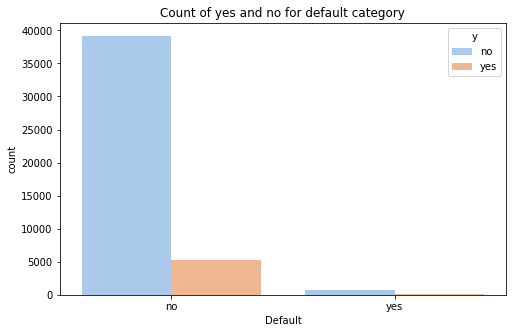

In [24]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.default, hue=data.y,ax=ax, palette='pastel')
plt.xlabel('Default')
plt.title('Count of yes and no for default category')

**Observation** - Genrally people don't have credit in default.

##6.Housing Loan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for house loan category')

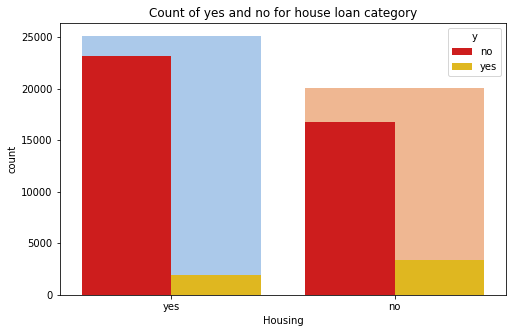

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.housing, ax=ax, palette='pastel')
sns.countplot(data.housing, hue=data.y,ax=ax, palette='hot')
plt.xlabel('Housing')
plt.title('Count of yes and no for house loan category')

**Observation** - Most of the people have home loan but only few of them opted for term deposit.

##7.Personal Loan

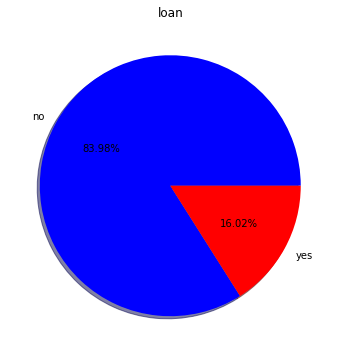

In [26]:
#Lets see pie plot for loan
plt.figure(figsize=(6,6))
plt.pie(data.loan.value_counts(),labels=data.loan.value_counts().index,autopct='%1.2f%%',shadow= True, colors='bright')
plt.title('loan')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for personal loan category')

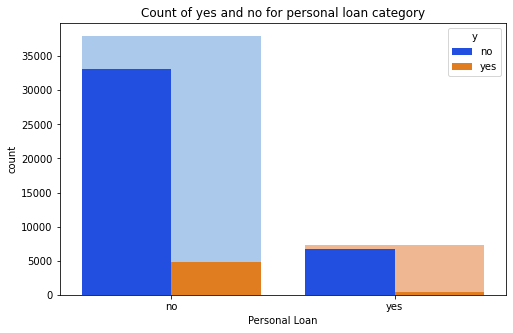

In [27]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.loan, ax=ax, palette='pastel')
sns.countplot(data.loan, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for personal loan category')

**Observation** - Majority of the people have not personal loans and thus very few of them opted for term deposit.

##8.Contact

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for contact category')

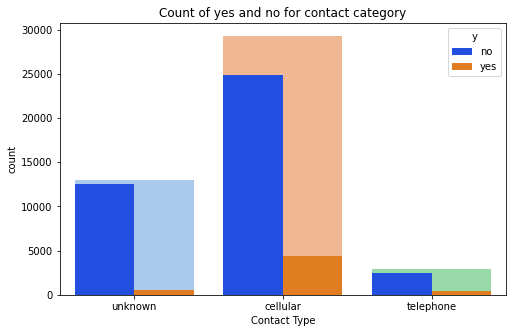

In [28]:
#Lets explore the count of accept and reject term deposit on contact type
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.contact, ax=ax, palette='pastel')
sns.countplot(data.contact, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Contact Type')
plt.title('Count of yes and no for contact category')

**Observation** - Cellular communication is more effective in comparison to other communication types.

##9.Months

In [29]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for every month')

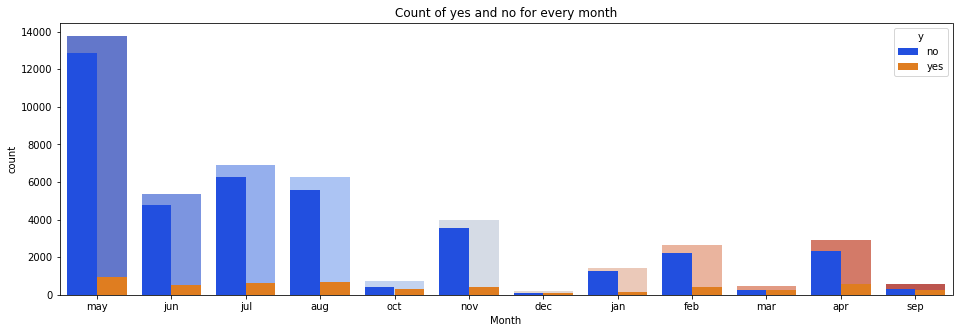

In [30]:
#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(data.month,palette='coolwarm')
sns.countplot(data.month, hue=data.y,ax=ax, palette='bright')
plt.xlabel('Month')
plt.title('Count of yes and no for every month')


**Observation** - There were maximum subscriptions in the month of may.
                



##10. Duration

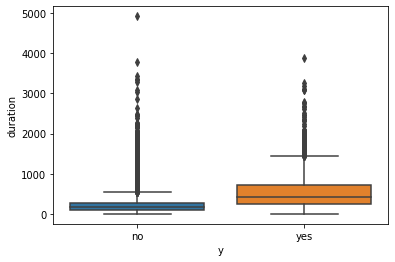

In [31]:
sns.boxplot(y='duration',x="y", data= data)

**Observation** - The above box plot shows that calls with large duration has more tendency for conversion

##11. Campaign

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


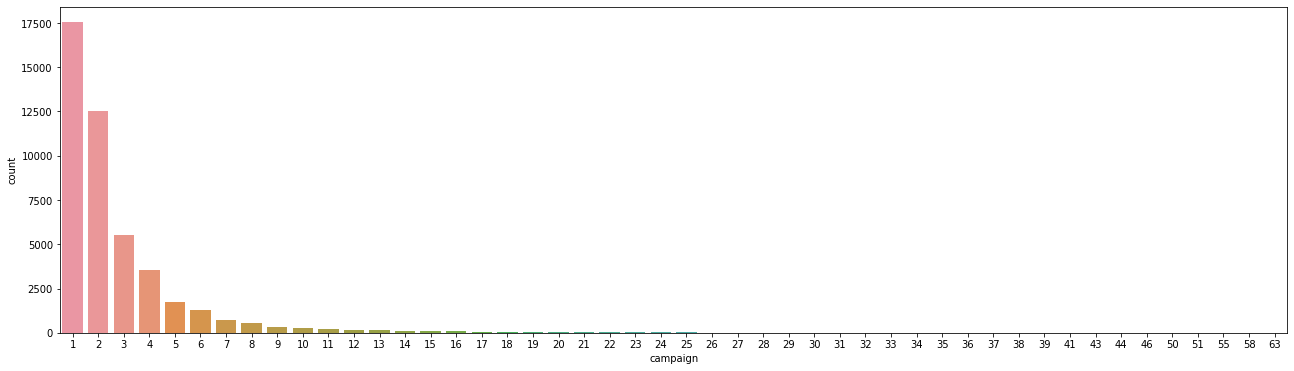

In [32]:
#Countplot of various number of contact were perfomed to how many people
plt.figure(figsize=(22,6))
sns.countplot(data['campaign'])
plt.show()


**Observation** - People were mostly contacted once but also some people also connect more number of time.